In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

# Linear Regression on house prices

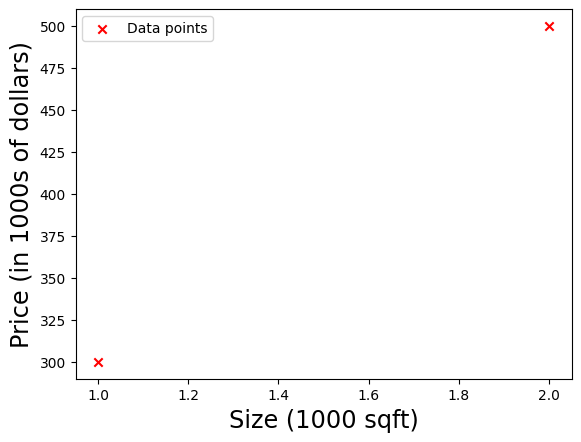

In [32]:
X_train = np.array([[1.0],[2.0]],dtype=np.float32)
y_train = np.array([[300.0],[500.0]],dtype=np.float32)

plt.scatter(X_train,y_train,marker='x',c='r',label="Data points")
plt.xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
plt.legend()
plt.show()

In [33]:
linear_layer = tf.keras.layers.Dense(units=1,activation='linear')

In [34]:
linear_layer.get_weights()

[]

In [35]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-0.4804176]], shape=(1, 1), dtype=float32)


In [36]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.4804176]], b=[0.]


In [37]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [38]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [39]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

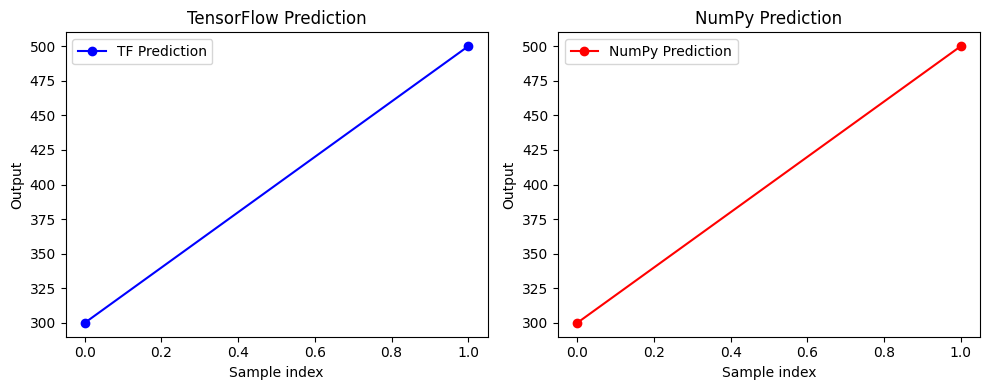

In [40]:
plt.figure(figsize=(10,4))

# Plot TensorFlow prediction
plt.subplot(1,2,1)
plt.plot(prediction_tf, 'bo-', label='TF Prediction')
plt.title("TensorFlow Prediction")
plt.xlabel("Sample index")
plt.ylabel("Output")
plt.legend()

# Plot NumPy prediction
plt.subplot(1,2,2)
plt.plot(prediction_np, 'ro-', label='NumPy Prediction')
plt.title("NumPy Prediction")
plt.xlabel("Sample index")
plt.ylabel("Output")
plt.legend()

plt.tight_layout()
plt.show()

# Logistic Regression

In [41]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

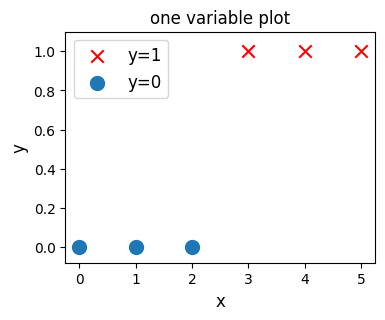

In [43]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0")

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [46]:
model = Sequential(
    [
        tf.keras.layers.Dense(1,input_dim =1,activation='sigmoid',name="Layer1")
    ]
)

c:\Users\OMEN\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
logistic_layer = model.get_layer('Layer1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[1.5100092]] [0.]
(1, 1) (1,)


In [49]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [50]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.01098694]]
